In [1]:
# Import our libraries 

# Pandas and numpy for data wrangling
import numpy as np
import pandas as pd

# Seaborn / matplotlib for visualization 
import seaborn as sns
import matplotlib.pyplot as plt

# Import the trees from sklearn
from sklearn import tree

# Helper function to split our data
from sklearn.model_selection import train_test_split

# Helper fuctions to evaluate our model.
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report, roc_auc_score, f1_score

# Helper function for hyper-parameter turning.
from sklearn.model_selection import GridSearchCV

# Import our Decision Tree
from sklearn.tree import DecisionTreeClassifier 

# Import our Random Forest 
from sklearn.ensemble import RandomForestClassifier

# Use inline so our visualizations display in notebook
%matplotlib inline

## Main Steps when building a Machine Learning Model. 
1. Inspect and explore data.
2. Select and engineer features.
3. Build and train model.
4. Evaluate model.

# #1 Inspect and explore data.
* Load titanic data
* Visualize all the data using sns.pairplot
* Check for null values

In [4]:
# Load in the titanic data set.
df_titanic = pd.read_csv('data/titanic.csv')

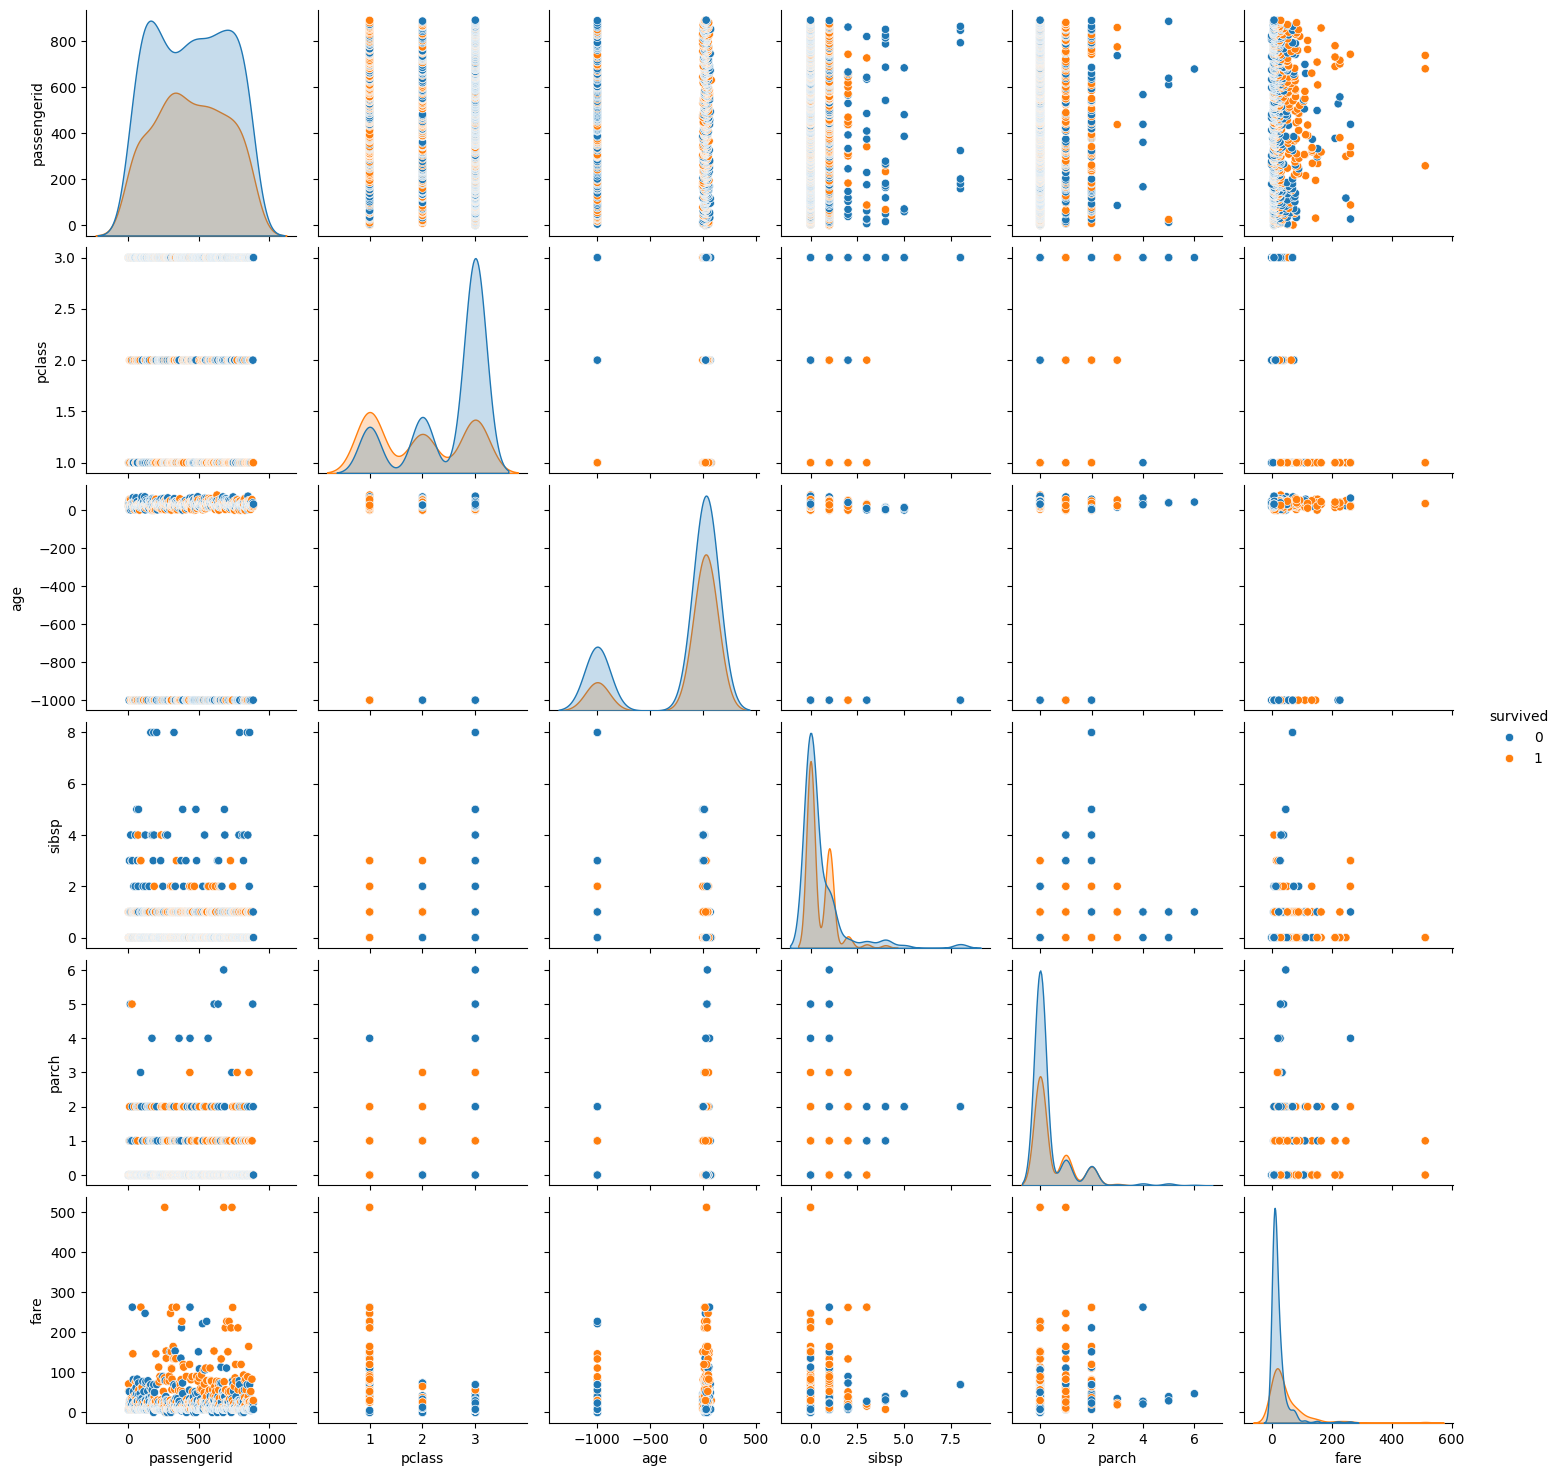

In [20]:
# Visualize all the data using sns.pairplot
sns.pairplot(df_titanic, hue='survived')

# here there is some data that is straight line circles almost as if linear regression would be 
# the best approach for them but not to sure for now. I am only thinkin about it since I have a 
# project I am doing for my data science class it looks bery similar.

In [7]:
# Check for null values
df_titanic.isnull().sum()

passengerid      0
survived         0
pclass           0
name             0
sex              0
age            177
sibsp            0
parch            0
ticket           0
fare             0
cabin          687
embarked         2
dtype: int64

# #2 Select and engineer features.
1. Fill age null values with -999
1. Convert to numerical values if need be by using `pd.get_dummies()`
1. Create a list of the features you are going to use.  In this case use as many or as little as you would like.
1. Define our `X` and `y`
1. Split our data into trainig and testing sets.

In [11]:
# Fill age null values with -999
df_titanic['age'].fillna(-999, inplace=True)

In [12]:
# Sanity Check
df_titanic.isnull().sum()

passengerid      0
survived         0
pclass           0
name             0
sex              0
age              0
sibsp            0
parch            0
ticket           0
fare             0
cabin          687
embarked         2
dtype: int64

In [24]:
# 1. Convert to numerical values if need be by using `pd.get_dummies()`
df_titanic = pd.get_dummies(df_titanic, columns=['sex', 'embarked', 'pclass'])

In [25]:
# sanity check 2
df_titanic.dtypes

passengerid      int64
survived         int64
name            object
age            float64
sibsp            int64
parch            int64
ticket          object
fare           float64
cabin           object
sex_female       uint8
sex_male         uint8
embarked_C       uint8
embarked_Q       uint8
embarked_S       uint8
pclass_1         uint8
pclass_2         uint8
pclass_3         uint8
dtype: object

In [26]:
df_titanic.head()

,passengerid,survived,name,age,sibsp,parch,ticket,fare,cabin,sex_female,sex_male,embarked_C,embarked_Q,embarked_S,pclass_1,pclass_2,pclass_3
0,1,0,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,0,1,0,0,1,0,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,1,0,1,0,0,1,0,0
2,3,1,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,1,0,0,0,1,0,0,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,1,0,0,0,1,1,0,0
4,5,0,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,0,1,0,0,1,0,0,1


In [32]:
# 2. Create a list of the features we are going to use.
selected_features = ['fare', 'age', 'sex_male', 'pclass_2', 'pclass_3', 'sibsp', 'parch', 'embarked_Q','embarked_S']


In [33]:
# Define our `X` and `y`
X = df_titanic[selected_features] # independent variables
y = df_titanic['survived']  # dependent variable


In [35]:
# Split our data into trainig and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)

print('Length of our Training data:', X_train.shape, '\nLength of our Testing data:', y_test.shape)

Length of our Training data: (712, 9) 
Length of our Testing data: (179,)


# #3 Build and train model.
1. For our first pass, initialize our model with `max_depth=2`.
2. Fit our model with our training data. 
3. Make predictions of our testing data. 
4. Evaluate and print our model scores using accuracy, precision, recall, f1 scores, and auc scores. 
    * To calculate auc score you have to get the predicted probabilites for the Survived class using `model.predict_proba(X_test)[:,1]`
5. Visualize our Decision Tree using provided code. 


In [37]:
# For our first pass, initialize our model with `max_depth=2`.

model = DecisionTreeClassifier(max_depth=2)

In [38]:
# Fit our model with our training data. 

model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

In [39]:
# Make predictions of our testing data. 

y_pred = model.predict(X_test)

In [42]:
# 4. Evaluate and print our model scores using accuracy, precision, recall, f1 scores, and auc scores. 
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Score: %f" % accuracy)

precision = precision_score(y_test, y_pred)
print("Precision Score: %f" % precision)

recall = recall_score(y_test, y_pred)
print("Recall Score: %f" % recall)

f1 = f1_score(y_test, y_pred)
print('F1 Score: %f' % f1)

# Calculate predicted probabilities
y_pred_proba = model.predict_proba(X_test)

# Keep only the proba for True
y_pred_proba = y_pred_proba[:,1]

# Compute auc score
auc = roc_auc_score(y_test, y_pred_proba)
print('AUC Score: %f' % auc)

Accuracy Score: 0.832402
Precision Score: 0.750000
Recall Score: 0.774194
F1 Score: 0.761905
AUC Score: 0.868004


# Visualize your tree

# Picking the right parameters...

# Parameter tuning of your Decision Tree using GridSearch or RandomizedSearch

### For assistance on this, look at Steves TA Tips code in `TA-Tips/random_forest_tuning.ipynb`


1. Make a dictionary of at least 3 parameters and a list of 3 values for each for your grid search. 
1. Initalize your GridSearchCV with a DecisionTreeClassifier, your param_grid, and what you are optimizing for.  Choose any of the five optimization strategies; accuracy, precision, recall, f1, or roc_auc.
1. Fit your GridSearchCV with your training data. 
1. Print the parameters of your best model. 
1. Evaluate your best model using accuracy, precision, recall, f1 scores, and auc scores. 
1. Visualize your best tree.
1. Which feature was your most important feature?

```python
tree.DecisionTreeClassifier(
    *,
    criterion='gini',
    splitter='best',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features=None,
    random_state=None,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    min_impurity_split=None,
    class_weight=None,
    presort='deprecated',
    ccp_alpha=0.0,
)
```


[Tips on how to customize / set the paramters in the decision tree.](https://scikit-learn.org/stable/modules/tree.html#tips-on-practical-use)

In [57]:
# 1. Make a dictionary of at least 3 parameters and a list of 3 values for each for your grid search.from sklearn.model_selection import GridSearchCV
params = { 
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [None, 5,10],
    'max_leaf_nodes': [None, 5, 10]
}

In [58]:
# 1. Initalize your GridSearchCV with a DecisionTreeClassifier, your param_grid, and what you are optimizing for.  Choose any of the five optimization strategies; accuracy, precision, recall, f1, or roc_auc.
grid_search_cv =  GridSearchCV(model, param_grid=params, scoring='accuracy')

In [59]:
# 1. Fit your GridSearchCV with your training data. 
grid_search_cv.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(max_depth=2),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [None, 5, 10],
                         'max_features': ['sqrt', 'log2', None],
                         'max_leaf_nodes': [None, 5, 10]},
             scoring='accuracy')

In [60]:
# 1. Print the parameters of your best model. 
# Print the best parameters it found
print(grid_search_cv.best_estimator_)

DecisionTreeClassifier(criterion='log_loss', max_depth=5, max_features='log2')


In [61]:
# 1. Evaluate your best model using accuracy, precision, recall, f1 scores, and auc scores. 

# This command gives you the best tree
model = grid_search_cv.best_estimator_

# Now lets evaluate our model
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Score: %f" % accuracy)

precision = precision_score(y_test, y_pred)
print("Precision Score: %f" % precision)

recall = recall_score(y_test, y_test)
print("Recall Score: %f" % recall)

f1 = f1_score(y_test, y_test)
print('F1 Score: %f' % f1)

# Calculate predicted probabilities, keep only probability for when class = 1
y_pred_proba = model.predict_proba(X_test)[:,1]
auc = roc_auc_score(y_test, y_pred_proba)
print('AUC Score: %f' % auc)

Accuracy Score: 0.837989
Precision Score: 0.779661
Recall Score: 1.000000
F1 Score: 1.000000
AUC Score: 0.844224


In [62]:
# 1. Which feature was your most important feature?
# Now lets look at our feature importances
feature_imp = pd.DataFrame.from_dict( {'feature_importance': model.feature_importances_,
                                       'feature':selected_features }).sort_values('feature_importance', ascending=False)
feature_imp

,feature_importance,feature
2,0.495062,sex_male
0,0.180217,fare
4,0.163078,pclass_3
1,0.074571,age
7,0.034557,embarked_Q
5,0.028378,sibsp
6,0.014388,parch
8,0.009749,embarked_S
3,0.000000,pclass_2


# Now onto Random Forests...
Were going to do the same with, but this time with a random forest. Remeber... Repetition is the father of learning.

1. Make a dictionary of at least 3 parameters and a list of 3 values for each for your grid search. 
1. Initalize your GridSearchCV with a RandomForestClassifer, your param_grid, and what you are optimizing for.  Choose any of the five optimization strategies; accuracy, precision, recall, f1, or roc_auc.
1. Fit your GridSearchCV with your training data. 
1. Print the parameters of your best model. 
1. Evaluate your best model using accuracy, precision, recall, f1 scores, and auc scores. 
1. Which feature was your most important feature?


# Parameters of the Random Forest Classifier

```python
RandomForestClassifier(
    n_estimators=100,
    *,
    criterion='gini',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features='auto',
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    min_impurity_split=None,
    bootstrap=True,
    oob_score=False,
    n_jobs=None,
    random_state=None,
    verbose=0,
    warm_start=False,
    class_weight=None,
    ccp_alpha=0.0,
    max_samples=None,
)
```

In [88]:
# 1. Make a dictionary of at least 3 parameters and a list of 3 values for each for your grid search. 
params = {
    'n_estimators': [50, 100, 200],         # Number of trees in the forest
    'max_depth': [None, 10, 20],            # Maximum depth of the tree
    'min_samples_split': [2, 5, 10]         # Minimum number of samples required to split an internal node
}

In [89]:
# 1. Initalize your GridSearchCV or RandomizedSearchCV with a RandomForestClassifer, 
# your param_grid, and what you are optimizing for.  Choose any of the five 
# optimization strategies; accuracy, precision, recall, f1, or roc_auc.

grid_search_cv = GridSearchCV(RandomForestClassifier(random_state=42), param_grid=params, scoring='precision')


In [90]:
# 1. Fit your GridSearchCV with your training data. 
grid_search_cv.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='precision')

In [91]:
# 1. Print the parameters of your best model. 
# Print the best parameters it found (in this case for precision)
print(grid_search_cv.best_params_)


{'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 50}


In [93]:
# 1. Evaluate your best model using accuracy, precision, recall, f1 scores, and auc scores. 

# This command gives you tree that has the highest f1-score. 
model = grid_search_cv.best_estimator_


# Now lets evaluate our model
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_pred, y_test)
print("Accuracy Score: %f" % accuracy)

precision = precision_score(y_pred, y_test)
print("Precision Score: %f" % precision)

recall = recall_score(y_pred, y_test)
print("Recall Score: %f" % recall)

f1 = f1_score(y_pred, y_test)
print('F1 Score: %f' % f1)

# Calculate predicted probabilities, keep only probability for when class = 1
y_pred_proba = model.predict_proba(X_test)[:,1]

auc = roc_auc_score(y_test, y_pred_proba)
print('AUC Score: %f' % auc)

Accuracy Score: 0.871508
Precision Score: 0.806452
Recall Score: 0.819672
F1 Score: 0.813008
AUC Score: 0.907706


In [94]:
# 1. Which feature was your most important feature?
# Now lets look at our feature importances
feature_imp = pd.Series(model.feature_importances_,index=selected_features).sort_values(ascending=False)
feature_imp

sex_male      0.382095
fare          0.220188
age           0.158407
pclass_3      0.088303
parch         0.048330
sibsp         0.044470
pclass_2      0.021998
embarked_S    0.021685
embarked_Q    0.014524
dtype: float64

# Build a random forest using the ny-vs-sf-housing.csv data. 
* Your target variable, aka the column you are trying to predict, aka your `y` variable is `in_sf`. 
* Can you get an accuracy above %88.8889?
* What was your most important feature?


In [98]:
df = pd.read_csv('data/ny-vs-sf-houses.csv')
df.head()

# Dependent Variable is in_sf

,in_sf,beds,bath,price,year_built,sqft,price_per_sqft,elevation
0,0,2.0,1.0,999000,1960,1000,999,10
1,0,2.0,2.0,2750000,2006,1418,1939,0
2,0,2.0,2.0,1350000,1900,2150,628,9
3,0,1.0,1.0,629000,1903,500,1258,9
4,0,0.0,1.0,439000,1930,500,878,10


In [99]:
df.isnull().sum() 
# NO NULL VALUES :D

in_sf             0
beds              0
bath              0
price             0
year_built        0
sqft              0
price_per_sqft    0
elevation         0
dtype: int64

In [100]:
df.dtypes
# all numeric!

in_sf               int64
beds              float64
bath              float64
price               int64
year_built          int64
sqft                int64
price_per_sqft      int64
elevation           int64
dtype: object

In [101]:
# SANITY CHECK 3
df['in_sf'].unique()

array([0, 1])

In [104]:
# BUILD, TRAIN, AND EVAULATE A RANDOM FOREST MODEL BELOW. 
model = RandomForestClassifier(random_state=42)

# Independent Variables
X = df[['beds', 'bath', 'price', 'year_built', 'sqft', 'price_per_sqft', 'elevation']]

# Dependent Variables
y = df['in_sf'] # 0 or 1 are possible values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)

model = RandomForestClassifier(random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)
# evaluate and print our model scores using accuracy, precision, recall, f1 scores, and auc scores. 
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Score: %f" % accuracy)

if accuracy > 0.888889:
    print("\nAccuarcy is above 88.8889%!!!\n")

precision = precision_score(y_test, y_pred)
print("Precision Score: %f" % precision)

recall = recall_score(y_test, y_pred)
print("Recall Score: %f" % recall)

f1 = f1_score(y_test, y_pred)
print('F1 Score: %f' % f1)

# Calculate predicted probabilities
y_pred_proba = model.predict_proba(X_test)

# Keep only the proba for True
y_pred_proba = y_pred_proba[:,1]

# Compute auc score
auc = roc_auc_score(y_test, y_pred_proba)
print('AUC Score: %f' % auc)

feature_imp = pd.Series(model.feature_importances_,index=['beds', 'bath', 'price', 'year_built', 'sqft', 'price_per_sqft', 'elevation']).sort_values(ascending=False)
feature_imp

Accuracy Score: 0.909091

Accuarcy is above 88.8889%!!!

Precision Score: 0.940000
Recall Score: 0.886792
F1 Score: 0.912621
AUC Score: 0.962674


elevation         0.355776
price_per_sqft    0.246165
price             0.115347
sqft              0.106862
year_built        0.088135
beds              0.057185
bath              0.030531
dtype: float64

In [106]:
# MOST IMPORTANT FEATURE IS ELEVATION!!!!!!
feature_imp.idxmax()

'elevation'

# Awesome difficult extra credit below:
Build a classifier using the adult_income.csv data.  
* The target variable is 'class'
* Start with just using these features `selected_features = ['age', 'fnlwgt', 'capital_gain', 'capital_loss', 'hours_per_week']`
* You have to include the pos_label in your precision, recall, and f1 scores. It just tells the classifier which one is the posotive label.  I provided the proper way below.

* See if you can get above 50% f1 score.  
* See some [super tricks and tips here](https://www.kaggle.com/code/jieyima/income-classification-model)

In [ ]:
df = pd.read_csv('data/adult_income.csv')
df.head()